<a href="https://colab.research.google.com/github/mhiriManel/demo/blob/main/High_dimensional_data/prostate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Lambda,Concatenate
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras import layers

from keras import backend as K
%matplotlib inline

df=pd.read_csv("/content/drive/MyDrive/data/High-dimensional/prostate_cancer/prostate cancer.csv")

In [ ]:
df

,samples,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V6025,V6026,V6027,V6028,V6029,V6030,V6031,V6032,V6033,response
0,1,-0.927178,-0.740039,-0.532016,-1.097891,-0.986673,0.018752,-0.863326,3.959997,-0.398219,...,-1.097891,-1.097891,-0.894733,0.850270,-1.097891,-0.302063,-0.767685,-0.452616,0.194001,normal
1,2,-0.835899,-0.835899,-0.585647,-0.835899,-0.329768,-0.835899,-0.835899,4.037788,-0.835899,...,-0.835899,-0.835899,-0.835899,0.038090,-0.835899,-0.835899,-0.835899,-0.835899,0.075500,normal
2,3,0.236073,0.252645,-1.154351,-0.372372,-0.338900,1.253467,0.506325,3.868961,0.201932,...,-1.154351,-1.154351,-0.372372,0.899781,-0.867200,0.360426,-1.154351,-1.154351,-1.154351,normal
3,4,-0.748623,-0.439165,0.790953,-1.033876,0.241115,1.216007,0.106282,3.976272,0.081755,...,-1.121534,-1.121534,-0.812076,1.230378,-0.355497,0.030647,-0.278810,-1.121534,-1.121534,normal
4,5,0.101239,-0.298285,-1.121519,-0.957714,0.342258,1.182937,0.029325,4.575871,-0.196466,...,-1.121519,-1.121519,-0.454932,0.891627,-0.593427,0.306316,-0.076496,-0.134480,-1.121519,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,-0.812419,-0.812419,-0.812419,-0.812419,-0.812419,-0.812419,-0.812419,3.843151,-0.812419,...,-0.812419,-0.812419,-0.217543,0.517631,0.424872,-0.812419,-0.812419,-0.812419,-0.001027,tumer
98,99,-0.798827,-0.551404,-0.416452,-0.798827,-0.798827,-0.798827,-0.551404,4.685605,-0.798827,...,-0.798827,-0.798827,-0.416452,0.268144,-0.798827,-0.798827,-0.798827,-0.798827,-0.145153,tumer
99,100,-0.783024,-0.783024,-0.534149,-0.783024,-0.783024,-0.783024,-0.783024,5.066788,-0.783024,...,-0.783024,-0.783024,-0.174171,0.320323,-0.783024,-0.783024,-0.783024,-0.783024,0.047432,tumer
100,101,-0.832069,-0.832069,-0.832069,-0.832069,-0.832069,-0.832069,-0.832069,4.016852,-0.832069,...,-0.832069,-0.832069,-0.832069,0.073101,-0.832069,-0.832069,-0.832069,-0.832069,0.035947,tumer


In [ ]:
df.to_csv("/content/drive/MyDrive/data/High-dimensional/prostate_cancer/prostatee.xlsx")

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblE=LabelEncoder()

df['response']= lblE.fit_transform(df['response'])
df

,samples,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V6025,V6026,V6027,V6028,V6029,V6030,V6031,V6032,V6033,response
0,1,-0.927178,-0.740039,-0.532016,-1.097891,-0.986673,0.018752,-0.863326,3.959997,-0.398219,...,-1.097891,-1.097891,-0.894733,0.850270,-1.097891,-0.302063,-0.767685,-0.452616,0.194001,0
1,2,-0.835899,-0.835899,-0.585647,-0.835899,-0.329768,-0.835899,-0.835899,4.037788,-0.835899,...,-0.835899,-0.835899,-0.835899,0.038090,-0.835899,-0.835899,-0.835899,-0.835899,0.075500,0
2,3,0.236073,0.252645,-1.154351,-0.372372,-0.338900,1.253467,0.506325,3.868961,0.201932,...,-1.154351,-1.154351,-0.372372,0.899781,-0.867200,0.360426,-1.154351,-1.154351,-1.154351,0
3,4,-0.748623,-0.439165,0.790953,-1.033876,0.241115,1.216007,0.106282,3.976272,0.081755,...,-1.121534,-1.121534,-0.812076,1.230378,-0.355497,0.030647,-0.278810,-1.121534,-1.121534,0
4,5,0.101239,-0.298285,-1.121519,-0.957714,0.342258,1.182937,0.029325,4.575871,-0.196466,...,-1.121519,-1.121519,-0.454932,0.891627,-0.593427,0.306316,-0.076496,-0.134480,-1.121519,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,-0.812419,-0.812419,-0.812419,-0.812419,-0.812419,-0.812419,-0.812419,3.843151,-0.812419,...,-0.812419,-0.812419,-0.217543,0.517631,0.424872,-0.812419,-0.812419,-0.812419,-0.001027,1
98,99,-0.798827,-0.551404,-0.416452,-0.798827,-0.798827,-0.798827,-0.551404,4.685605,-0.798827,...,-0.798827,-0.798827,-0.416452,0.268144,-0.798827,-0.798827,-0.798827,-0.798827,-0.145153,1
99,100,-0.783024,-0.783024,-0.534149,-0.783024,-0.783024,-0.783024,-0.783024,5.066788,-0.783024,...,-0.783024,-0.783024,-0.174171,0.320323,-0.783024,-0.783024,-0.783024,-0.783024,0.047432,1
100,101,-0.832069,-0.832069,-0.832069,-0.832069,-0.832069,-0.832069,-0.832069,4.016852,-0.832069,...,-0.832069,-0.832069,-0.832069,0.073101,-0.832069,-0.832069,-0.832069,-0.832069,0.035947,1


In [ ]:
column = df['response']
count= pd.DataFrame(column.value_counts())
print('Count of each value in column response is : ', count)

Count of each value in column response is :     response
1        52
0        50


In [ ]:
df.columns

Index(['samples', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       ...
       'V6025', 'V6026', 'V6027', 'V6028', 'V6029', 'V6030', 'V6031', 'V6032',
       'V6033', 'response'],
      dtype='object', length=6035)

In [ ]:
# df.loc[pd.isna(df["V1"]), :].index

In [ ]:
# Count number of NAN in all Dataframe
j=0
for column_name in df.columns:
    vcolumn = df[column_name]
    # Get the count of nan in column 
    count= vcolumn.isna().sum()
    if count!= 0:
       print('Count of NAN values in column ', column_name, ' is : ', count)
       j+=1
print(j)

0


In [ ]:
X= df.iloc[:, 1:6034]
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V6024,V6025,V6026,V6027,V6028,V6029,V6030,V6031,V6032,V6033
0,-0.927178,-0.740039,-0.532016,-1.097891,-0.986673,0.018752,-0.863326,3.959997,-0.398219,-1.097891,...,-0.029602,-1.097891,-1.097891,-0.894733,0.850270,-1.097891,-0.302063,-0.767685,-0.452616,0.194001
1,-0.835899,-0.835899,-0.585647,-0.835899,-0.329768,-0.835899,-0.835899,4.037788,-0.835899,-0.835899,...,-0.835899,-0.835899,-0.835899,-0.835899,0.038090,-0.835899,-0.835899,-0.835899,-0.835899,0.075500
2,0.236073,0.252645,-1.154351,-0.372372,-0.338900,1.253467,0.506325,3.868961,0.201932,-1.154351,...,0.860446,-1.154351,-1.154351,-0.372372,0.899781,-0.867200,0.360426,-1.154351,-1.154351,-1.154351
3,-0.748623,-0.439165,0.790953,-1.033876,0.241115,1.216007,0.106282,3.976272,0.081755,-1.121534,...,0.614026,-1.121534,-1.121534,-0.812076,1.230378,-0.355497,0.030647,-0.278810,-1.121534,-1.121534
4,0.101239,-0.298285,-1.121519,-0.957714,0.342258,1.182937,0.029325,4.575871,-0.196466,-1.121519,...,0.639511,-1.121519,-1.121519,-0.454932,0.891627,-0.593427,0.306316,-0.076496,-0.134480,-1.121519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-0.812419,-0.812419,-0.812419,-0.812419,-0.812419,-0.812419,-0.812419,3.843151,-0.812419,-0.812419,...,-0.081670,-0.812419,-0.812419,-0.217543,0.517631,0.424872,-0.812419,-0.812419,-0.812419,-0.001027
98,-0.798827,-0.551404,-0.416452,-0.798827,-0.798827,-0.798827,-0.551404,4.685605,-0.798827,-0.798827,...,-0.298417,-0.798827,-0.798827,-0.416452,0.268144,-0.798827,-0.798827,-0.798827,-0.798827,-0.145153
99,-0.783024,-0.783024,-0.534149,-0.783024,-0.783024,-0.783024,-0.783024,5.066788,-0.783024,-0.783024,...,-0.463852,-0.783024,-0.783024,-0.174171,0.320323,-0.783024,-0.783024,-0.783024,-0.783024,0.047432
100,-0.832069,-0.832069,-0.832069,-0.832069,-0.832069,-0.832069,-0.832069,4.016852,-0.832069,-0.832069,...,-0.832069,-0.832069,-0.832069,-0.832069,0.073101,-0.832069,-0.832069,-0.832069,-0.832069,0.035947


In [ ]:
# Count number of zeros in all columns of Dataframe
j=0
for column_name in X.columns:
    vcolumn = X[column_name]
    count = (vcolumn == 0).sum()
    if count!= 0:
      print('Count of zeros in column ', column_name, ' is : ', count)
      j+=1
print (j)

0


In [ ]:
ylabel= df.iloc[:, 6034] 
# ylabel=pd.DataFrame(ylabel)
ylabel

0      0
1      0
2      0
3      0
4      0
      ..
97     1
98     1
99     1
100    1
101    1
Name: response, Length: 102, dtype: int64

# Descritizer

In [ ]:
# from sklearn.preprocessing import KBinsDiscretizer
# # discretization transform the raw data

# kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
# data_trans = kbins.fit_transform(X)
# # summarize first few rows
# # print(data_trans[:10, :])

# data_trans=pd.DataFrame(data_trans)
# data_trans

In [ ]:
# jj

# INfo mesurement

In [ ]:
# columns= X.columns
# dfDis= pd.DataFrame(columns=columns,index = columns)
# dfDis

In [ ]:
# def entropy(vec, base=2):
# 	" Returns the empirical entropy H(X) in the input vector."
# 	_, vec = np.unique(vec, return_counts=True)
# 	prob_vec = np.array(vec/float(sum(vec)))
# 	if base == 2:
# 		logfn = np.log2
# 	elif base == 10:
# 		logfn = np.log10
# 	else:
# 		logfn = np.log
# 	return prob_vec.dot(-logfn(prob_vec))

# def conditional_entropy(x, y):
# 	"Returns H(X|Y)."
# 	uy, uyc = np.unique(y, return_counts=True)
# 	prob_uyc = uyc/float(sum(uyc))
# 	cond_entropy_x = np.array([entropy(x[y == v]) for v in uy])
# 	return prob_uyc.dot(cond_entropy_x)
	
# def mutual_information(x, y):
# 	" Returns the information gain/mutual information [H(X)-H(X|Y)] between two random vars x & y."
# 	return entropy(x) - conditional_entropy(x, y)

# def symmetrical_uncertainty(x, y):
# 	" Returns 'symmetrical uncertainty' (SU) - a symmetric mutual information measure."
# 	return 2.0*mutual_information(x, y)/(entropy(x) + entropy(y))

In [ ]:
# v1 = symmetrical_uncertainty(data_trans.iloc[:,5],data_trans.iloc[:,5])
# v1

In [ ]:
# # def verif(v):
# #   if v in [200,400,600,800,900,1000,1200,1400,1600,1800,2000,2200,2400,2500,2600,2800,3000,3200,3400,3500,3600,3800,4000,4200,4400,4500,4600,4700,4800,
# #            5000,5100,5200,5300,5400,5500,5600,5700,5900,6032,6033,6034]:
# #     return True
# def verif(v):
#   if v in [1410,1420,1430,1440,1441,1442,1443]:
#     return True

# # # if verif(201):
# # #   print("hoho")

In [ ]:
# K=0
# for i in range(1400,1402):
#   c1= data_trans.iloc[:,i]
#   for j in range(0,6033):
#     c2= data_trans.iloc[:,j]
#     su = symmetrical_uncertainty(c1, c2)
#     dfDis.iloc[i][j]= su  
#     print('SU(',data_trans.columns[i] ,'|| ', data_trans.columns[j] ,'): %.3f bits' % su)
#     # K=K+1
#   # if verif(i):
#   #   dfDis.to_csv('/content/drive/MyDrive/data/High-dimensional/prostate_cancer/dfDis_Disk_su_1401_1401.xlsx')
# dfDis.to_csv('/content/drive/MyDrive/data/High-dimensional/prostate_cancer/dfDis_Disk_su_1401_1401.xlsx')
# dfDis

In [ ]:
# dfDis1401=pd.read_csv("/content/drive/MyDrive/data/High-dimensional/prostate_cancer/dfDis_Disk_su_1401_1401.xlsx")
# dfDis1401= dfDis1401.drop(columns="Unnamed: 0")
# dfDis1401

In [ ]:
# dfDis1401.head(1443)

In [ ]:
# for i in range(1,5):
#   print(i)

In [ ]:
# for i in range(1401,1441):
#   for j in range(0,6033):
#     dfDis_disk_su.iloc[i,j]=dfDis1401.iloc[i,j]

# dfDis_disk_su.head(1402)

In [ ]:
# dfDis_disk_su.to_csv('/content/drive/MyDrive/data/High-dimensional/prostate_cancer/dfDis_Disk_suF.xlsx')

In [ ]:
# dfDis_disk_su.head(1402)

# dfdis

In [ ]:
# dfDis

In [ ]:
# df1 =pd.read_csv("/content/drive/MyDrive/data/High-dimensional/prostate_cancer/dfDis_Disk_su.1.xlsx")
# df1= df1.drop(columns="Unnamed: 0")

In [ ]:
# df1= df1.drop(columns="Unnamed: 0")
# df1.head(602)

In [ ]:
# df1.iloc[600,0]

In [ ]:
# df2 =pd.read_csv("/content/drive/MyDrive/data/High-dimensional/prostate_cancer/dfDis_Disk_su_2.xlsx")
# df2= df2.drop(columns="Unnamed: 0")

In [ ]:
# df2.head(602)

In [ ]:
# dfDis_disk_su.head(1442)

In [ ]:
# df2.head(1402)

In [ ]:
# df2.iloc[1401,0]

In [ ]:
# for i in range(601,1401):
#   for j in range(0,6033):
#     df1.iloc[i,j]=df2.iloc[i,j]

# # df1

In [ ]:
# df1.head(1402)

In [ ]:
# df3 =pd.read_csv("/content/drive/MyDrive/data/High-dimensional/prostate_cancer/dfDis_Disk_su_3.xlsx")
# df3= df3.drop(columns="Unnamed: 0")

# df4 =pd.read_csv("/content/drive/MyDrive/data/High-dimensional/prostate_cancer/dfDis_Disk_su_4.xlsx")
# df4= df4.drop(columns="Unnamed: 0")

# df5 =pd.read_csv("/content/drive/MyDrive/data/High-dimensional/prostate_cancer/dfDis_Disk_su_5.xlsx")
# df5= df5.drop(columns="Unnamed: 0")

# df6 =pd.read_csv("/content/drive/MyDrive/data/High-dimensional/prostate_cancer/dfDis_Disk_su_6.xlsx")
# df6= df6.drop(columns="Unnamed: 0")

# df7 =pd.read_csv("/content/drive/MyDrive/data/High-dimensional/prostate_cancer/dfDis_Disk_su_7.xlsx")
# df7= df7.drop(columns="Unnamed: 0")

In [ ]:
# df3.head(2202)

In [ ]:
# for i in range(1441,2201):
#   for j in range(0,6033):
#     df1.iloc[i,j]=df3.iloc[i,j]

In [ ]:
# df1.head(2202)

In [ ]:
# df4.head(3802)

In [ ]:
# for i in range(2201,3801):
#   for j in range(0,6033):
#     df1.iloc[i,j]=df4.iloc[i,j]
# df1.head(3802)

In [ ]:
# df5.head(3802)

In [ ]:
# df5.head(4602)

In [ ]:
# for i in range(3801,4601):
#   for j in range(0,6033):
#     df1.iloc[i,j]=df5.iloc[i,j]
# df1.head(4602)

In [ ]:
# df5.head(4602)

In [ ]:
# df6.head(4602)

In [ ]:
# df6.head(5402)
# # df1.head(4602)

In [ ]:
# for i in range(4601,5402):
#   for j in range(0,6033):
#     df1.iloc[i,j]=df6.iloc[i,j]
# df1.head(4602)

In [ ]:
# df1.head(4602)

In [ ]:
# df7.head(5403)

In [ ]:
# for i in range(5401,6034):
#   for j in range(0,6033):
#     df1.iloc[i,j]=df7.iloc[i,j]
# df1

In [ ]:
# df1

In [ ]:
# df1.to_csv('/content/drive/MyDrive/data/High-dimensional/prostate_cancer/dfDis_Disk_suFF.xlsx')

# dfsuf

In [ ]:
dfDis_disk_su =pd.read_csv("/content/drive/MyDrive/data/High-dimensional/prostate_cancer/dfDis_Disk_suF.xlsx")
dfDis_disk_su

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V6024,V6025,V6026,V6027,V6028,V6029,V6030,V6031,V6032,V6033
0,0,1.000000,0.230041,0.114729,0.133390,0.188120,0.279327,0.228091,0.138898,0.326458,...,0.222680,0.062694,0.175429,0.184821,0.231832,0.037289,0.368642,0.063786,0.118729,0.173477
1,1,0.230041,1.000000,0.098625,0.118520,0.153383,0.170202,0.142690,0.112569,0.284791,...,0.183322,0.127255,0.122894,0.156257,0.089203,0.065210,0.211977,0.149182,0.157557,0.135600
2,2,0.114729,0.098625,1.000000,0.055996,0.126106,0.169865,0.166630,0.114215,0.190388,...,0.092319,0.032864,0.063184,0.071677,0.176852,0.063849,0.126423,0.076895,0.130412,0.079232
3,3,0.133390,0.118520,0.055996,1.000000,0.057168,0.131503,0.102431,0.020701,0.110903,...,0.102904,0.197039,0.213304,0.120981,0.219211,0.076061,0.142447,0.084369,0.099462,0.087328
4,4,0.188120,0.153383,0.126106,0.057168,1.000000,0.146450,0.171382,0.069609,0.199968,...,0.163476,0.057682,0.126237,0.089303,0.167068,0.036026,0.169268,0.105995,0.080293,0.096128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6028,6028,0.037289,0.065210,0.063849,0.076061,0.036026,0.057128,0.066923,0.058314,0.062441,...,0.054119,0.035004,0.070817,0.044541,0.062557,1.000000,0.074526,0.025043,0.032091,0.052154
6029,6029,0.368642,0.211977,0.126423,0.142447,0.169268,0.308898,0.201679,0.041524,0.362169,...,0.295560,0.049086,0.094537,0.193037,0.255581,0.074526,1.000000,0.100645,0.097331,0.192069
6030,6030,0.063786,0.149182,0.076895,0.084369,0.105995,0.111383,0.090042,0.056732,0.123309,...,0.071218,0.135097,0.039596,0.028706,0.076307,0.025043,0.100645,1.000000,0.094403,0.088385
6031,6031,0.118729,0.157557,0.130412,0.099462,0.080293,0.127666,0.044537,0.059076,0.125598,...,0.124914,0.064930,0.111798,0.076944,0.151304,0.032091,0.097331,0.094403,1.000000,0.121153


In [ ]:
dfDis_disk_su= dfDis_disk_su.drop(columns="Unnamed: 0")
dfDis_disk_su

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V6024,V6025,V6026,V6027,V6028,V6029,V6030,V6031,V6032,V6033
0,1.000000,0.230041,0.114729,0.133390,0.188120,0.279327,0.228091,0.138898,0.326458,0.146574,...,0.222680,0.062694,0.175429,0.184821,0.231832,0.037289,0.368642,0.063786,0.118729,0.173477
1,0.230041,1.000000,0.098625,0.118520,0.153383,0.170202,0.142690,0.112569,0.284791,0.095293,...,0.183322,0.127255,0.122894,0.156257,0.089203,0.065210,0.211977,0.149182,0.157557,0.135600
2,0.114729,0.098625,1.000000,0.055996,0.126106,0.169865,0.166630,0.114215,0.190388,0.050320,...,0.092319,0.032864,0.063184,0.071677,0.176852,0.063849,0.126423,0.076895,0.130412,0.079232
3,0.133390,0.118520,0.055996,1.000000,0.057168,0.131503,0.102431,0.020701,0.110903,0.512575,...,0.102904,0.197039,0.213304,0.120981,0.219211,0.076061,0.142447,0.084369,0.099462,0.087328
4,0.188120,0.153383,0.126106,0.057168,1.000000,0.146450,0.171382,0.069609,0.199968,0.098288,...,0.163476,0.057682,0.126237,0.089303,0.167068,0.036026,0.169268,0.105995,0.080293,0.096128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6028,0.037289,0.065210,0.063849,0.076061,0.036026,0.057128,0.066923,0.058314,0.062441,0.073989,...,0.054119,0.035004,0.070817,0.044541,0.062557,1.000000,0.074526,0.025043,0.032091,0.052154
6029,0.368642,0.211977,0.126423,0.142447,0.169268,0.308898,0.201679,0.041524,0.362169,0.161596,...,0.295560,0.049086,0.094537,0.193037,0.255581,0.074526,1.000000,0.100645,0.097331,0.192069
6030,0.063786,0.149182,0.076895,0.084369,0.105995,0.111383,0.090042,0.056732,0.123309,0.081692,...,0.071218,0.135097,0.039596,0.028706,0.076307,0.025043,0.100645,1.000000,0.094403,0.088385
6031,0.118729,0.157557,0.130412,0.099462,0.080293,0.127666,0.044537,0.059076,0.125598,0.121802,...,0.124914,0.064930,0.111798,0.076944,0.151304,0.032091,0.097331,0.094403,1.000000,0.121153


# FC

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score, rand_score
from sklearn.metrics import homogeneity_score,completeness_score, v_measure_score, fowlkes_mallows_score
# from validclust import cop, dunn
# import validclust as vc 

## HCA

In [ ]:
! pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


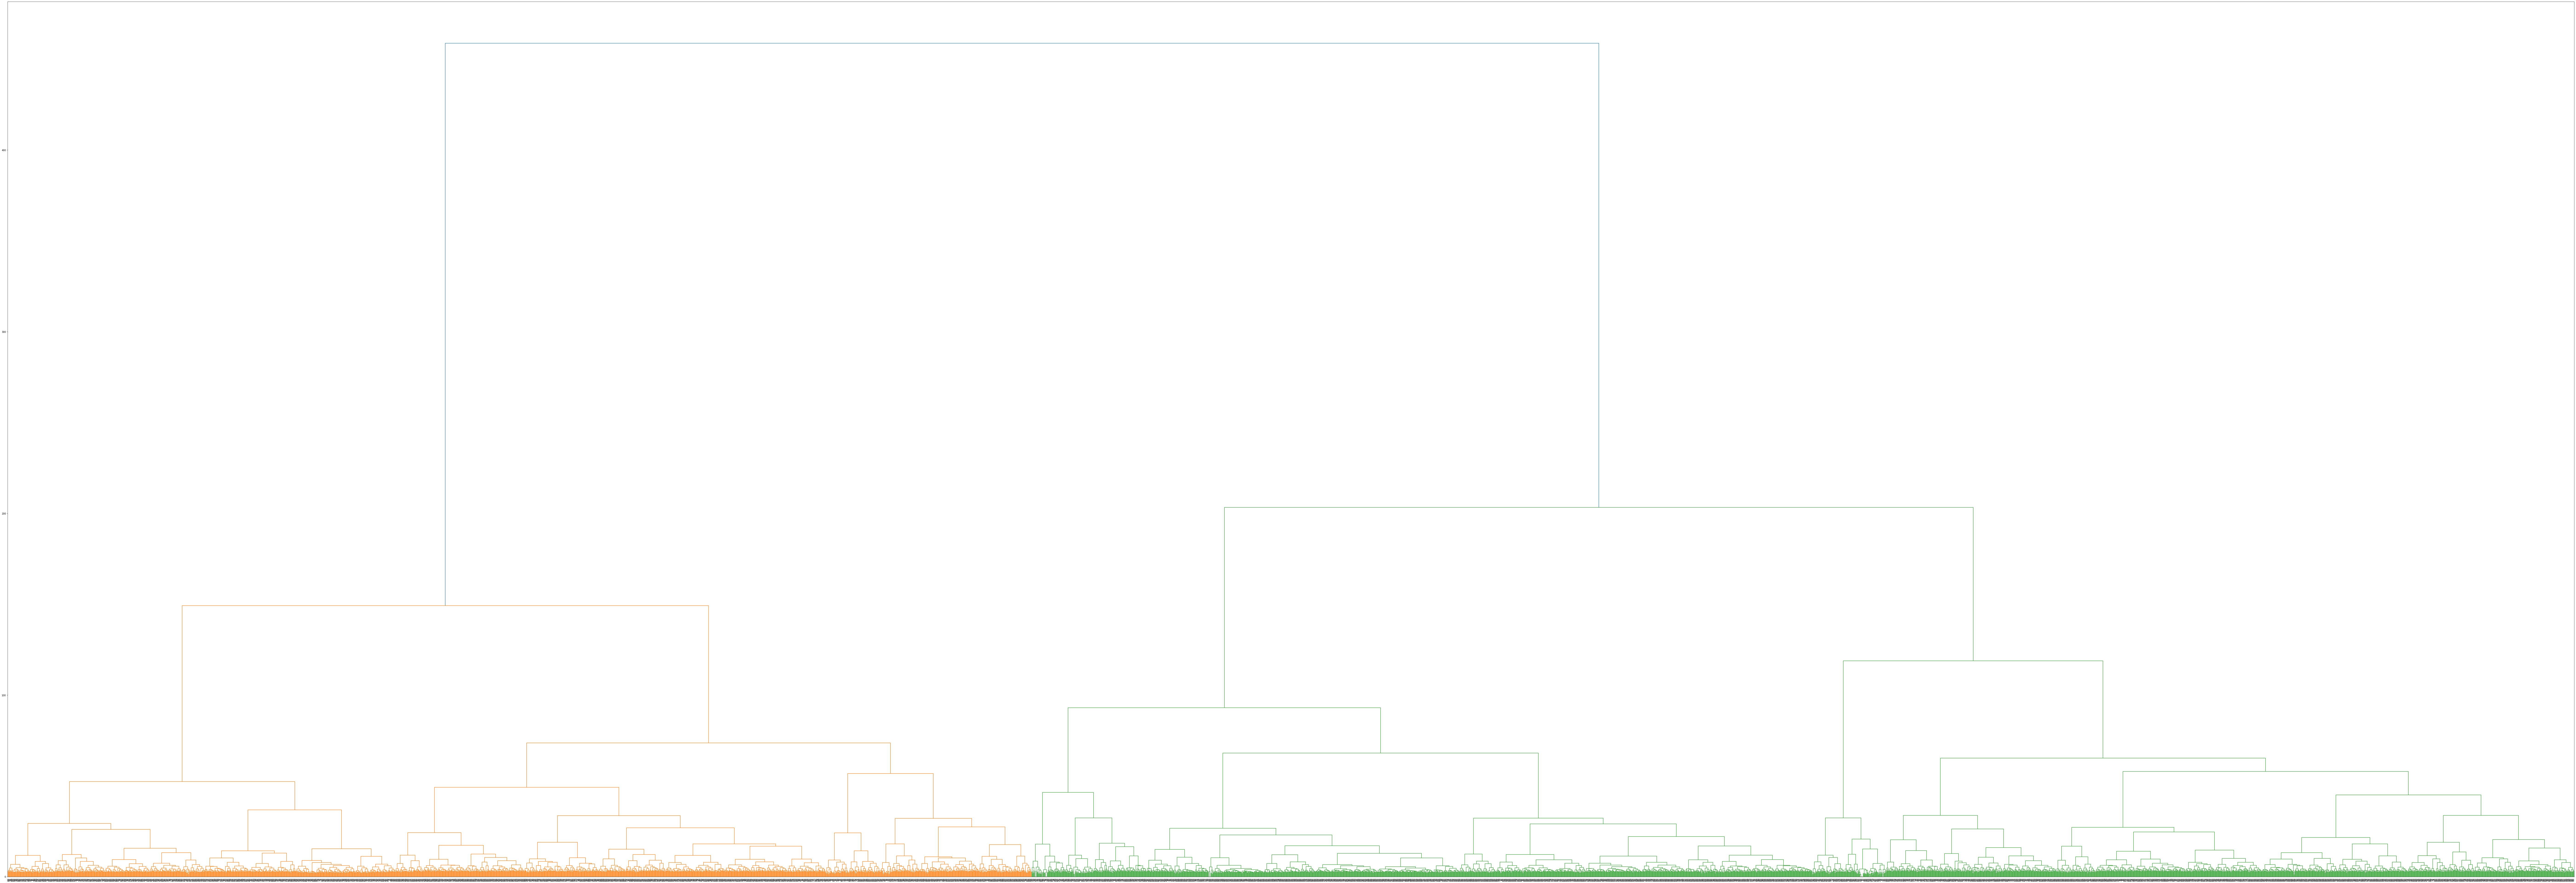

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(200, 70))
dendro= sch.dendrogram(sch.linkage(dfDis_disk_su, method="ward", metric="euclidean"))

In [ ]:
hac= AgglomerativeClustering( n_clusters=3, affinity="euclidean", linkage="ward")

hac.fit(dfDis_disk_su)
hac_membership= hac.labels_

print(hac.labels_)
# hac_pred_labels = hac.fit_predict(dfDis_disk_su)
# print(hac_pred_labels)

[0 1 2 ... 2 2 1]


In [ ]:
nb_clusters= [2,3,4,5,6,11,20]
for i in (nb_clusters):
  print("**********************nb cluster= ", i,"**********************")  
  hac= AgglomerativeClustering( n_clusters=i, affinity="euclidean", linkage="ward")
  hac.fit(dfDis_disk_su)
  hac_membership= hac.labels_
  # print("dunn= ",vc.dunn(dfDis_disk_su.to_numpy(), hac.labels_) )
  print ("silhouette_score= ",silhouette_score(dfDis_disk_su,hac_membership))

 
# # print ("homogeneity_score= ",homogeneity_score( ylabel, hac_pred_labels))
# print ("completeness_score= ",completeness_score( ylabel, hac_pred_labels))
# print ("v_measure_score= ",v_measure_score (ylabel, hac_pred_labels))
# print ("fowlkes_mallows_score= ",fowlkes_mallows_score ( ylabel, hac_pred_labels)) 

""" 
2=> 0.389
3=> 0.250
4=> 0.197
5=> 0.203
6=> 0.201
11=> 0.114
20 =>  0.07
"""

**********************nb cluster=  2 **********************
silhouette_score=  0.38924315488522326
**********************nb cluster=  3 **********************
silhouette_score=  0.25038210026689317
**********************nb cluster=  4 **********************
silhouette_score=  0.19785322673605413
**********************nb cluster=  5 **********************
silhouette_score=  0.20337578591872604
**********************nb cluster=  6 **********************
silhouette_score=  0.20146153134182093
**********************nb cluster=  11 **********************
silhouette_score=  0.11435353575709935
**********************nb cluster=  20 **********************
silhouette_score=  0.0754017406710245


' \n2=> 0.389\n3=> 0.250\n4=> 0.197\n5=> 0.203\n6=> 0.201\n11=> 0.114\n20 =>  0.07\n'

In [ ]:
# jj

## HDBSCAN

In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import hdbscan

clusterer_hdbscan = hdbscan.HDBSCAN(algorithm='best', 
                            alpha=1.0, 
                            approx_min_span_tree=True,
                            gen_min_span_tree=False, 
                            leaf_size=40, 
                            metric='euclidean', 
                            min_cluster_size=5, 
                            min_samples=5, 
                            p=None)  
clusterer_hdbscan.fit(dfDis_disk_su)

HDBSCAN(min_samples=5)

In [ ]:
jj

In [ ]:
# print ("silhouette_score= ",silhouette_score(dfDis_disk_su,clusterer_hdbscan.labels_))
# vc.dunn(dfDis_disk_su.to_numpy(), clusterer_hdbscan.labels_)

In [ ]:
# set(clusterer_hdbscan.labels_)

In [ ]:
# set(clusterer_hdbscan.labels_)

# from collections import Counter

# data = clusterer_hdbscan.labels_
# count = Counter(data)
# df = pd.DataFrame.from_dict(count, orient='index')
# df.plot(kind='bar')

# # Display the plot
# plt.show()

# Define the clusters

In [ ]:
l=list(hac.labels_) 
# l=list(clusterer_hdbscan.labels_)

indices = [i for i, x in enumerate(l) if x == -1]
print(len(indices))
inputneg= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 0]
print(len(indices))
input0= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 1]
print(len(indices))
input1 = X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 2]
print(len(indices))
input2 = X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 3]
print(len(indices))
input3= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 4]
print(len(indices))
input4= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 5]
print(len(indices))
input5= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 6]
print(len(indices))
input6= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 7]
print(len(indices))
input7= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 8]
print(len(indices))
input8= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 9]
print(len(indices))
input9= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 10]
print(len(indices))
input10= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 11]
print(len(indices))
input11= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 12]
print(len(indices))
input12= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 13]
print(len(indices))
input13= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 14]
print(len(indices))
input14= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 15]
print(len(indices))
input15= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 16]
print(len(indices))
input16= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 17]
print(len(indices))
input17= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 18]
print(len(indices))
input18= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 19]
print(len(indices))
input19= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 20]
print(len(indices))
input20= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 21]
print(len(indices))
input21= X.iloc[:,indices]

indices = [i for i, x in enumerate(l) if x == 22]
print(len(indices))
input22= X.iloc[:,indices]

In [ ]:
# jj

In [ ]:
x_trainneg = tf.convert_to_tensor(inputneg)
x_train0 = tf.convert_to_tensor(input0)
x_train1 = tf.convert_to_tensor(input1)
x_train2 = tf.convert_to_tensor(input2)
x_train3 = tf.convert_to_tensor(input3)
x_train4 = tf.convert_to_tensor(input4)

x_train5 = tf.convert_to_tensor(input5)
x_train6 = tf.convert_to_tensor(input6)
x_train7 = tf.convert_to_tensor(input7)
x_train8 = tf.convert_to_tensor(input8)
x_train9 = tf.convert_to_tensor(input9)

x_train10 = tf.convert_to_tensor(input10)
x_train11 = tf.convert_to_tensor(input11)
x_train12 = tf.convert_to_tensor(input12)
x_train13 = tf.convert_to_tensor(input13)
x_train14 = tf.convert_to_tensor(input14)

x_train15 = tf.convert_to_tensor(input15)
x_train16 = tf.convert_to_tensor(input16)
x_train17 = tf.convert_to_tensor(input17)
x_train18 = tf.convert_to_tensor(input18)
x_train19 = tf.convert_to_tensor(input19)

x_train20 = tf.convert_to_tensor(input20)
x_train21 = tf.convert_to_tensor(input21)
x_train22 = tf.convert_to_tensor(input22)

print(x_train0.shape)
print(x_trainneg.shape)
print(x_train1.shape)

print(x_train20.shape)
print(x_train21.shape)

In [ ]:
x_train20

NameError: ignored

In [ ]:
# jj

# VAE

In [ ]:
from keras import backend as K,regularizers
from keras.layers import Dropout

## 6FC

In [ ]:
# # # Encoder
# from keras import backend as K
# from keras.layers import Dropout
# from keras import regularizers

# latent_dim = 30 # Number of latent dim parameters

# input_shape=(1496,)
# i0_in = Input(shape=input_shape)
# i0 = Dense(1300, activation ='tanh')(i0_in)
# i0 = Dropout(0.5)(i0)
# i0 = Dense(1100, activation ='tanh')(i0)
# i0 = Dropout(0.5)(i0)
# i0 = Dense(900, activation ='tanh')(i0)
# i0 = Dropout(0.5)(i0)
# i0 = Dense(700, activation ='tanh')(i0)
# i0 = Dropout(0.5)(i0)
# i0 = Dense(500, activation ='tanh')(i0)
# i0 = Dropout(0.5)(i0)
# i0 = Dense(300, activation ='tanh')(i0)
# i0 = Dropout(0.5)(i0)
# i0 = Dense(100, activation ='tanh')(i0)
# i0 = Dense(80, activation ='tanh')(i0)
# i0 = Dense(40, activation ='tanh')(i0)

# input_shape=(1617,)
# i1_in = Input(shape=input_shape)
# i1 = Dense(1400, activation ='tanh')(i1_in)
# i1 = Dropout(0.5)(i1)
# i1 = Dense(1200, activation ='tanh')(i1)
# i1 = Dropout(0.5)(i1)
# i1 = Dense(1000, activation ='tanh')(i1)
# i1 = Dropout(0.5)(i1)
# i1 = Dense(800, activation ='tanh')(i1)
# i1 = Dropout(0.5)(i1)
# i1 = Dense(600, activation ='tanh')(i1)
# i1 = Dropout(0.5)(i1)
# i1 = Dense(400, activation ='tanh')(i1)
# i1 = Dropout(0.5)(i1)
# i1 = Dense(200, activation ='tanh')(i1)
# i1 = Dropout(0.5)(i1)
# i1 = Dense(100, activation ='tanh')(i1)
# i1 = Dense(80, activation ='tanh')(i1)
# i1 = Dense(40, activation ='tanh')(i1)

# input_shape=(1565,)
# i2_in = Input(shape=input_shape)
# i2 = Dense(1300, activation ='tanh')(i2_in)
# i2 = Dropout(0.5)(i2)
# i2 = Dense(1100, activation ='tanh')(i2)
# i2 = Dropout(0.5)(i2)
# i2 = Dense(900, activation ='tanh')(i2)
# i2 = Dropout(0.5)(i2)
# i2 = Dense(700, activation ='tanh')(i2)
# i2 = Dropout(0.5)(i2)
# i2 = Dense(500, activation ='tanh')(i2)
# i2 = Dropout(0.5)(i2)
# i2 = Dense(300, activation ='tanh')(i2)
# i2 = Dropout(0.5)(i2)
# i2 = Dense(100, activation ='tanh')(i2)
# i2 = Dense(80, activation ='tanh')(i2)
# i2 = Dense(40, activation ='tanh')(i2)

# input_shape=(911,)
# i3_in = Input(shape=input_shape)
# i3 = Dense(700, activation ='tanh')(i3_in)
# i3 = Dropout(0.5)(i3)
# i3 = Dense(500, activation ='tanh')(i3)
# i3 = Dropout(0.5)(i3)
# i3 = Dense(300, activation ='tanh')(i3)
# i3 = Dropout(0.5)(i3)
# i3 = Dense(100, activation ='tanh')(i3)
# i3 = Dense(80, activation ='tanh')(i3)
# i3 = Dense(40, activation ='tanh')(i3)

# input_shape=(270,)
# i4_in = Input(shape=input_shape)
# i4 = Dense(100, activation ='tanh')(i4_in)
# i4 = Dense(80, activation ='tanh')(i4)
# i4 = Dense(40, activation ='tanh')(i4)

# input_shape=(174,)
# i5_in = Input(shape=input_shape)
# i5 = Dense(100, activation ='tanh')(i5_in)
# i5 = Dense(80, activation ='tanh')(i5)
# i5 = Dense(40, activation ='tanh')(i5)

# c = Concatenate(axis=-1)([i0,i1,i2,i3,i4,i5])

# z_mean = Dense(latent_dim)(c)   #Mean values of encoded input
# z_log_sigma = Dense(latent_dim, name="z_log_sigma")(c)  #Std dev. (variance) of encoded input

# from keras import backend as K
# def sampling(args):
#     z_mean, z_log_sigma = args
#     epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=0.1)
#     return z_mean + K.exp(z_log_sigma) * epsilon
# z = Lambda(sampling, name="z_layer")([z_mean, z_log_sigma])

# # Create encoder
# encoder = keras.Model([i0_in,i1_in,i2_in,i3_in,i4_in,i5_in], [z_mean, z_log_sigma, z], name='encoder')

# print(encoder.summary())
# plot_model(encoder)

In [ ]:
# """
#            kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
#            bias_regularizer=regularizers.L2(1e-4), 
#            activity_regularizer=regularizers.L2(1e-5), """
# decoder_input = Input(shape=(latent_dim, ))

# y0_D = Dense(40, activation ='tanh')(decoder_input)
# y0_D = Dense(80, activation ='tanh')(y0_D)
# y0_D = Dense(100, activation ='tanh')(y0_D)
# y0_D = Dense(300, activation ='tanh')(y0_D)
# y0_D = Dense(500, activation ='tanh')(y0_D)
# y0_D = Dropout(0.5)(y0_D)
# y0_D = Dense(700, activation ='tanh')(y0_D)
# y0_D = Dropout(0.5)(y0_D)
# y0_D = Dense(900, activation ='tanh')(y0_D)
# y0_D = Dropout(0.5)(y0_D)
# y0_D = Dense(1100, activation ='tanh')(y0_D)
# y0_D = Dropout(0.5)(y0_D)
# y0_D = Dense(1300, activation ='tanh')(y0_D)
# y0_D = Dropout(0.5)(y0_D)
# y0_D = Dense(1496, activation ='tanh',name="output0")(y0_D)

# y1_D = Dense(40, activation ='tanh')(decoder_input)
# y1_D = Dense(80, activation ='tanh')(y1_D)
# y1_D = Dense(100, activation ='tanh')(y1_D)
# y1_D = Dense(200, activation ='tanh')(y1_D)
# y1_D = Dropout(0.5)(y1_D)
# y1_D = Dense(400, activation ='tanh')(y1_D)
# y1_D = Dropout(0.5)(y1_D)
# y1_D = Dense(600, activation ='tanh')(y1_D)
# y1_D = Dropout(0.5)(y1_D)
# y1_D = Dense(800, activation ='tanh')(y1_D)
# y1_D = Dropout(0.5)(y1_D)
# y1_D = Dense(1000, activation ='tanh')(y1_D)
# y1_D = Dropout(0.5)(y1_D)
# y1_D = Dense(1200, activation ='tanh')(y1_D)
# y1_D = Dropout(0.5)(y1_D)
# y1_D = Dense(1400, activation ='tanh')(y1_D)
# y1_D = Dropout(0.5)(y1_D)
# y1_D = Dense(1617, activation ='tanh',name="output1")(y1_D)

# y2_D = Dense(40, activation ='tanh')(decoder_input)
# y2_D = Dense(80, activation ='tanh')(y2_D)
# y2_D = Dense(100, activation ='tanh')(y2_D)
# y2_D = Dense(300, activation ='tanh')(y2_D)
# y2_D = Dropout(0.5)(y2_D)
# y2_D = Dense(500, activation ='tanh')(y2_D)
# y2_D = Dropout(0.5)(y2_D)
# y2_D = Dense(700, activation ='tanh')(y2_D)
# y2_D = Dropout(0.5)(y2_D)
# y2_D = Dense(900, activation ='tanh')(y2_D)
# y2_D = Dropout(0.5)(y2_D)
# y2_D = Dense(1100, activation ='tanh')(y2_D)
# y2_D = Dropout(0.5)(y2_D)
# y2_D = Dense(1300, activation ='tanh')(y2_D)
# y2_D = Dropout(0.5)(y2_D)
# y2_D = Dense(1565, activation ='tanh',name="output2")(y2_D)

# y3_D = Dense(40, activation ='tanh')(decoder_input)
# y3_D = Dense(80, activation ='tanh')(y3_D)
# y3_D = Dense(100, activation ='tanh')(y3_D)
# y3_D = Dense(300, activation ='tanh')(y3_D)
# y3_D = Dropout(0.5)(y3_D)
# y3_D = Dense(500, activation ='tanh')(y3_D)
# y3_D = Dropout(0.5)(y3_D)
# y3_D = Dense(700, activation ='tanh')(y3_D)
# y3_D = Dropout(0.5)(y3_D)
# y3_D = Dense(911, activation ='tanh',name="output3")(y3_D)

# y4_D = Dense(40, activation ='tanh')(decoder_input)
# y4_D = Dense(80, activation ='tanh')(y4_D)
# y4_D = Dense(100, activation ='tanh')(y4_D)
# y4_D = Dense(270, activation ='tanh',name="output4")(y4_D)

# y5_D = Dense(40, activation ='tanh')(decoder_input)
# y5_D = Dense(80, activation ='tanh')(y5_D)
# y5_D = Dense(100, activation ='tanh')(y5_D)
# y5_D = Dense(174, activation ='tanh',name="output5")(y5_D)

# # Define and summarize decoder model
# decoder = Model(decoder_input,[y0_D,y1_D,y2_D,y3_D,y4_D,y5_D]) #,z_D

# decoder.summary()
# plot_model(decoder)

In [ ]:
# # instantiate VAE model
# outputs = decoder(encoder([i0_in,i1_in,i2_in,i3_in,i4_in,i5_in])[2])
# # vae = keras.Model([x_in, y_in], outputs)
# vae = keras.Model([i0_in,i1_in,i2_in,i3_in,i4_in,i5_in],outputs ) #[outputs, output_vae]
# vae.summary()
# plot_model (vae)

In [ ]:
# vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=[['mse','mse','mse','mse','mse','mse']])

In [ ]:
# history= vae.fit([x_train0,x_train2,x_train1,x_train3,x_train5,x_train4],
#                  [x_train0,x_train2,x_train1,x_train3,x_train5,x_train4],
#                  epochs=200, 
#                  batch_size=64, 
#                  validation_split= 0.3) # v x_train0,x_train1 

In [ ]:
# def plt_hist(hist):
#     # summarize history for loss
#     plt.plot(hist.history['loss'])
#     plt.plot(hist.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper right')

# plt_hist(history)

## 3FC

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2407)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 2000)         4816000     ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 1835)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1791)]       0           []                               
                                                                                            

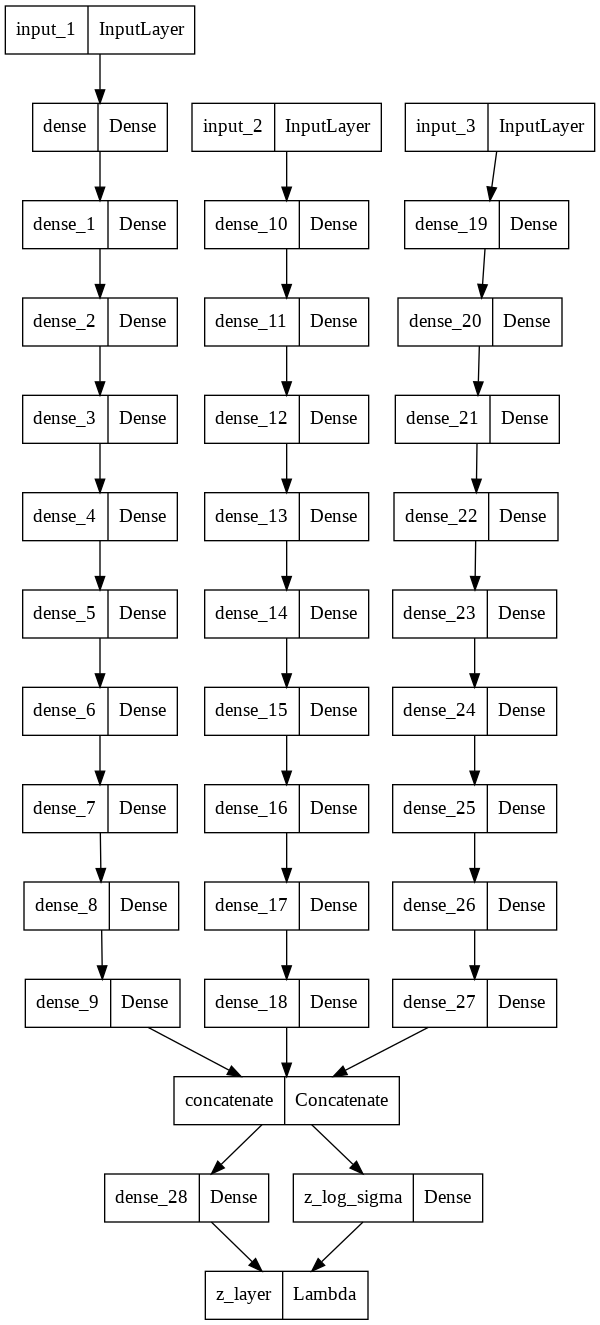

In [ ]:
from keras.layers.regularization.dropout import Dropout
# # Encoder
from keras import backend as K

latent_dim = 30 # Number of latent dim parameters

input_shape=(2407,)
x_in = Input(shape=input_shape)
x = Dense(2000, activation ='tanh')(x_in)
# x = Dropout(0.5)(x)
x = Dense(1600, activation ='tanh')(x)
# x = Dropout(0.5)(x)
x = Dense(1100, activation ='tanh')(x)
# x = Dropout(0.5)(x)
x = Dense(800, activation ='tanh')(x)
# x = Dropout(0.5)(x)
x = Dense(600, activation ='tanh')(x)
# x = Dropout(0.5)(x)
x = Dense(400, activation ='tanh')(x)
# x = Dropout(0.5)(x)
x = Dense(100, activation ='tanh')(x)
x = Dense(80, activation ='tanh')(x)
x = Dense(60, activation ='tanh')(x)
x = Dense(40, activation ='tanh')(x)

input_shape=(1835,)
y_in = Input(shape=input_shape)
y = Dense(1600, activation ='tanh')(y_in)
# y = Dropout(0.5)(y)
y = Dense(1100, activation ='tanh')(y)
# y = Dropout(0.5)(y)
y = Dense(800, activation ='tanh')(y)
# y = Dropout(0.5)(y)
y = Dense(600, activation ='tanh')(y)
# y = Dropout(0.5)(y)
y = Dense(400, activation ='tanh')(y)
# y = Dropout(0.5)(y)
y = Dense(100, activation ='tanh')(y)
y = Dense(80, activation ='tanh')(y)
y = Dense(60, activation ='tanh')(y)
y = Dense(40, activation ='tanh')(y)

input_shape=(1791,)
v_in = Input(shape=input_shape)
v = Dense(1600, activation ='tanh')(v_in)
# v = Dropout(0.5)(v)
v = Dense(1100, activation ='tanh')(v)
# v = Dropout(0.5)(v)
v = Dense(800, activation ='tanh')(v)
# v = Dropout(0.5)(v)
v = Dense(600, activation ='tanh')(v)
# v = Dropout(0.5)(v)
v = Dense(400, activation ='tanh')(v)
# v = Dropout(0.5)(v)
v = Dense(100, activation ='tanh')(v)
v = Dense(80, activation ='tanh')(v)
v = Dense(60, activation ='tanh')(v)
v = Dense(40, activation ='tanh')(v)

c = Concatenate(axis=-1)([x, y,v])

z_mean = Dense(latent_dim)(c)   #Mean values of encoded input
z_log_sigma = Dense(latent_dim, name="z_log_sigma")(c)  #Std dev. (variance) of encoded input

from keras import backend as K
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon
z = Lambda(sampling,name="z_layer")([z_mean, z_log_sigma])

# Create encoder
encoder = keras.Model([x_in, y_in,v_in], [z_mean, z_log_sigma, z], name='encoder')

print(encoder.summary())
plot_model(encoder)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 dense_48 (Dense)               (None, 40)           1240        ['input_4[0][0]']                
                                                                                                  
 dense_49 (Dense)               (None, 60)           2460        ['dense_48[0][0]']               
                                                                                                  
 dense_29 (Dense)               (None, 40)           1240        ['input_4[0][0]']                
                                                                                              

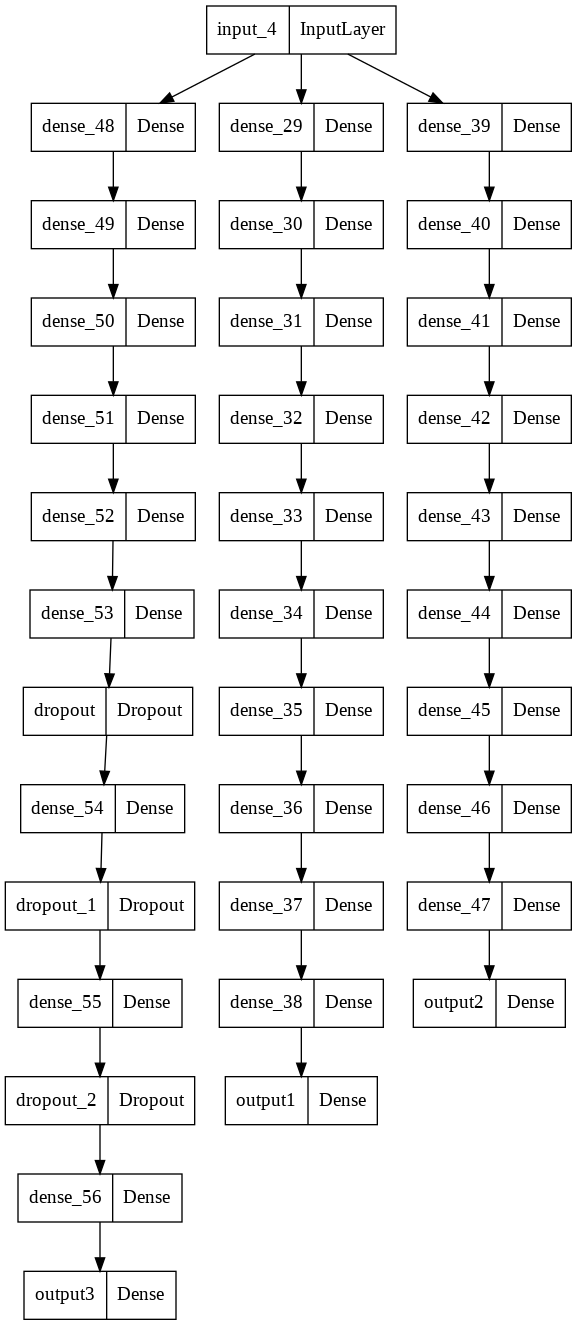

In [ ]:
decoder_input = Input(shape=(latent_dim, ))

x_D = Dense(40, activation ='tanh')(decoder_input)
x_D = Dense(60, activation ='tanh')(x_D)
x_D = Dense(80, activation ='tanh')(x_D)
x_D = Dense(100, activation ='tanh')(x_D)
x_D = Dense(400, activation ='tanh')(x_D)
# x_D = Dropout(0.5)(x_D)
x_D = Dense(600, activation ='tanh')(x_D)
# x_D = Dropout(0.5)(x_D)
x_D = Dense(800, activation ='tanh')(x_D)
# x_D = Dropout(0.5)(x_D)
x_D = Dense(1100, activation ='tanh')(x_D)
# x_D = Dropout(0.5)(x_D)
x_D = Dense(1600, activation ='tanh')(x_D)
# x_D = Dropout(0.5)(x_D)
x_D = Dense(2000, activation ='tanh')(x_D)
# x_D = Dropout(0.5)(x_D)
x_D = Dense(2407, activation ='tanh', name="output1")(x_D )

y_D = Dense(40, activation ='tanh')(decoder_input)
y_D = Dense(60, activation ='tanh')(y_D)
y_D = Dense(80, activation ='tanh')(y_D)
y_D = Dense(100, activation ='tanh')(y_D)
y_D = Dense(400, activation ='tanh')(y_D)
# y_D = Dropout(0.5)(y_D)
y_D = Dense(600, activation ='tanh')(y_D)
# y_D = Dropout(0.5)(y_D)
y_D = Dense(800, activation ='tanh')(y_D)
# y_D = Dropout(0.5)(y_D)
y_D = Dense(1100, activation ='tanh')(y_D)
# y_D = Dropout(0.5)(y_D)
y_D = Dense(1600, activation ='tanh')(y_D)
# y_D = Dropout(0.5)(y_D)
y_D = Dense(1835, activation ='tanh',name="output2")(y_D)

v_D = Dense(40, activation ='tanh')(decoder_input)
v_D = Dense(60, activation ='tanh')(v_D)
v_D = Dense(80, activation ='tanh')(v_D)
v_D = Dense(100, activation ='tanh')(v_D)
v_D = Dense(400, activation ='tanh')(v_D)
# v_D = Dropout(0.5)(v_D)
v_D = Dense(600, activation ='tanh')(v_D)
v_D = Dropout(0.5)(v_D)
v_D = Dense(800, activation ='tanh')(v_D)
v_D = Dropout(0.5)(v_D)
v_D = Dense(1100, activation ='tanh')(v_D)
v_D = Dropout(0.5)(v_D)
v_D = Dense(1600, activation ='tanh')(v_D)
v_D = Dense(1791, activation ='tanh',name="output3")(v_D)

# Define and summarize decoder model
decoder = Model(decoder_input,[x_D, y_D,v_D]) #,z_D

decoder.summary()
plot_model(decoder)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2407)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1835)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1791)]       0           []                               
                                                                                                  
 encoder (Functional)           [(None, 30),         24084800    ['input_1[0][0]',                
                                 (None, 30),                      'input_2[0][0]',          

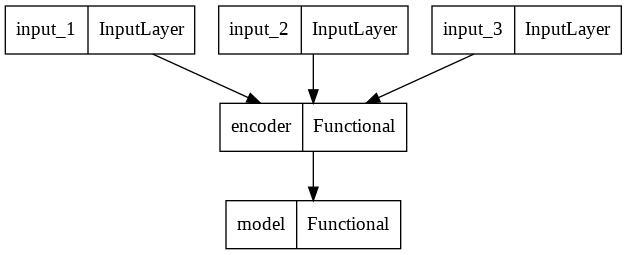

In [ ]:
# instantiate VAE model
outputs = decoder(encoder([x_in, y_in,v_in])[2])
# vae = keras.Model([x_in, y_in], outputs)
vae = keras.Model([x_in, y_in,v_in],outputs ) #[outputs, output_vae]
vae.summary()
plot_model (vae)

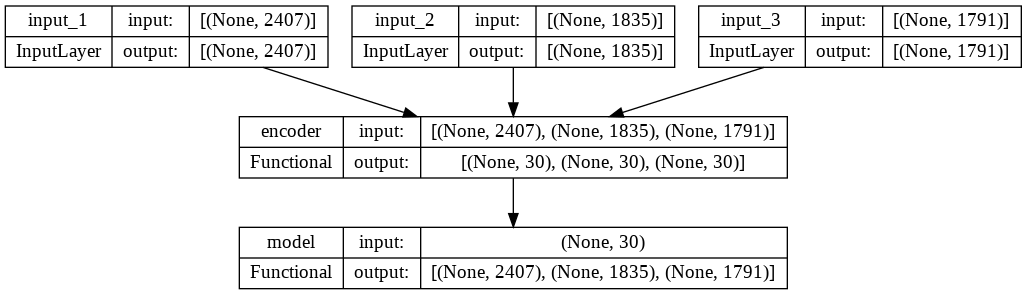

In [ ]:
plot_model(encoder, to_file='/content/drive/MyDrive/data/High-dimensional/prostate_cancer/_prostate_encoder.png', show_shapes=True, show_layer_names=True)
plot_model(decoder, to_file='/content/drive/MyDrive/data/High-dimensional/prostate_cancer/_prostate_decoder.png', show_shapes=True, show_layer_names=True)
plot_model(vae, to_file='/content/drive/MyDrive/data/High-dimensional/prostate_cancer/_prostate_mvae.png', show_shapes=True, show_layer_names=True)

In [ ]:
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=[['mse','mse','mse']])

In [ ]:
history= vae.fit([x_train0,x_train2,x_train1],[x_train0,x_train2,x_train1],epochs=200, batch_size=64, validation_split= 0.3) # 

In [ ]:
def plt_hist(hist):
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')

plt_hist(history)

In [ ]:
# 

## VAE for hdbscan

In [ ]:
# """kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
#                  bias_regularizer=regularizers.L2(1e-4), 
#                  activity_regularizer=regularizers.L2(1e-5),"""
# # # Encoder
# from keras import backend as K
# from keras.layers import Dropout
# from keras import regularizers

# latent_dim = 20 # Number of latent dim parameters

# input_shape=(5012,)
# i0_in = Input(shape=input_shape)
# i0 = Dense(4800, activation ='tanh')(i0_in)
# i0 = Dropout(0.5)(i0)
# # i0 = Dense(4500, activation ='tanh')(i0)
# # i0 = Dense(4000, activation ='tanh')(i0)
# # i0 = Dense(3800, activation ='tanh')(i0)
# # i0 = Dense(3500, activation ='tanh')(i0)
# # i0 = Dense(3000, activation ='tanh')(i0)
# # # i0 = Dropout(0.5)(i0)
# # i0 = Dense(2800, activation ='tanh')(i0)
# # i0 = Dense(2500, activation ='tanh')(i0)
# i0 = Dense(2000, activation ='tanh')(i0)
# i0 = Dropout(0.5)(i0)
# # i0 = Dense(1800, activation ='tanh')(i0)
# # i0 = Dense(1500, activation ='tanh')(i0)
# i0 = Dense(1000, activation ='tanh')(i0)
# i0 = Dropout(0.5)(i0)
# # i0 = Dense(800, activation ='tanh')(i0)
# i0 = Dense(500, activation ='tanh')(i0)
# i0 = Dropout(0.5)(i0)
# # i0 = Dense(300, activation ='tanh')(i0)
# i0 = Dense(100, activation ='tanh')(i0)
# i0 = Dense(50, activation ='tanh')(i0)

# input_shape=(427,)
# i1_in = Input(shape=input_shape)
# i1 = Dense(300, activation ='tanh')(i1_in)
# i1 = Dense(200, activation ='tanh')(i1)
# i1 = Dense(100, activation ='tanh')(i1)
# i1 = Dense(50, activation ='tanh')(i1)

# input_shape=(249,)
# i2_in = Input(shape=input_shape)
# i2 = Dense(200, activation ='tanh')(i2_in)
# i2 = Dense(150, activation ='tanh')(i2)
# i2 = Dense(100, activation ='tanh')(i2)
# i2 = Dense(50, activation ='tanh')(i2)

# input_shape=(75,)
# i3_in = Input(shape=input_shape)
# i3 = Dense(50, activation ='tanh')(i3_in)

# input_shape=(57,)
# i4_in = Input(shape=input_shape)
# i4 = Dense(30, activation ='tanh')(i4_in)

# input_shape=(33,)
# i5_in = Input(shape=input_shape)

# input_shape=(23,)
# i6_in = Input(shape=input_shape)

# input_shape=(21,)
# i7_in = Input(shape=input_shape)

# input_shape=(18,)
# i8_in = Input(shape=input_shape)

# input_shape=(17,)
# i9_in = Input(shape=input_shape)

# input_shape=(14,)
# i10_in = Input(shape=input_shape)#

# input_shape=(13,)
# i11_in = Input(shape=input_shape)

# input_shape=(12,)
# i12_in = Input(shape=input_shape)

# input_shape=(11,)
# i13_in = Input(shape=input_shape)

# input_shape=(10,)
# i14_in = Input(shape=input_shape)

# input_shape=(8,)
# i15_in = Input(shape=input_shape)

# input_shape=(7,)
# i16_in = Input(shape=input_shape)

# input_shape=(6,)
# i17_in = Input(shape=input_shape)

# input_shape=(5,)
# i18_in = Input(shape=input_shape)

# input_shape=(5,)
# i19_in = Input(shape=input_shape)

# input_shape=(5,)
# i20_in = Input(shape=input_shape)

# input_shape=(5,)
# i21_in = Input(shape=input_shape)

# c = Concatenate(axis=-1)([i0,i1,i2,i3,i4,i5_in,i6_in,i7_in,i8_in,i9_in,i10_in,i11_in,i12_in,i13_in,i14_in,i15_in,i16_in,i17_in,i18_in,i19_in,i20_in,i21_in])

# z_mean = Dense(latent_dim)(c)   #Mean values of encoded input
# z_log_sigma = Dense(latent_dim, name="z_log_sigma")(c)  #Std dev. (variance) of encoded input

# from keras import backend as K
# def sampling(args):
#     z_mean, z_log_sigma = args
#     epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=0.1)
#     return z_mean + K.exp(z_log_sigma) * epsilon
# z = Lambda(sampling, name="z_layer")([z_mean, z_log_sigma])

# # Create encoder
# encoder = keras.Model([i0_in,i1_in,i2_in,i3_in,i4_in,i5_in,i6_in,i7_in,i8_in,i9_in,i10_in,i11_in,i12_in,i13_in,i14_in,i15_in,i16_in,i17_in,i18_in,i19_in,i20_in,i21_in], [z_mean, z_log_sigma, z], name='encoder')

# print(encoder.summary())
# plot_model(encoder)

In [ ]:
# """
#            kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
#            bias_regularizer=regularizers.L2(1e-4), 
#            activity_regularizer=regularizers.L2(1e-5), """
# decoder_input = Input(shape=(latent_dim, ))

# y0_D = Dense(50, activation ='tanh')(decoder_input)
# y0_D = Dense(100, activation ='tanh')(y0_D)
# # y0_D = Dense(300,  activation ='tanh')(y0_D)
# y0_D = Dense(500,  activation ='tanh')(y0_D)
# # y0_D = Dense(800,  activation ='tanh')(y0_D)
# y0_D = Dense(1000,  activation ='tanh')(y0_D)
# # y0_D = Dense(1500,  activation ='tanh')(y0_D)
# # y0_D = Dense(1800,  activation ='tanh')(y0_D)
# y0_D = Dense(2000,  activation ='tanh')(y0_D)
# # y0_D = Dense(2500,  activation ='tanh')(y0_D)
# # y0_D = Dense(2800,  activation ='tanh')(y0_D)
# # y0_D = Dense(3000,  activation ='tanh')(y0_D)
# # y0_D = Dense(3500,  activation ='tanh')(y0_D)
# # y0_D = Dense(3800,  activation ='tanh')(y0_D)
# # y0_D = Dense(4000,  activation ='tanh')(y0_D)
# # y0_D = Dense(4500,  activation ='tanh')(y0_D)
# y0_D = Dense(4800,  activation ='tanh')(y0_D)
# y0_D = Dense(5012, activation ='tanh',name="output0")(y0_D)

# y1_D = Dense(50, activation ='tanh')(decoder_input)
# y1_D = Dense(100, activation ='tanh')(y1_D)
# y1_D = Dense(200, activation ='tanh')(y1_D)
# y1_D = Dense(300, activation ='tanh')(y1_D)
# y1_D = Dense(427, activation ='tanh',name="output1")(y1_D)

# y2_D = Dense(50, activation ='tanh')(decoder_input)
# y2_D = Dense(100, activation ='tanh')(y2_D)
# y2_D = Dense(150, activation ='tanh')(y2_D)
# y2_D = Dense(200, activation ='tanh')(y2_D)
# y2_D = Dense(249, activation ='tanh',name="output2")(y2_D)

# y3_D = Dense(50, activation ='tanh')(decoder_input)
# y3_D = Dense(75, activation ='tanh',name="output3")(y3_D)

# y4_D = Dense(30, activation ='tanh')(decoder_input)
# y4_D = Dense(57, activation ='tanh',name="output4")(y4_D)

# y5_D = Dense(33, activation ='tanh',name="output5")(decoder_input)

# y6_D = Dense(23, activation ='tanh',name="output6")(decoder_input)

# y7_D = Dense(21, activation ='tanh',name="output7")(decoder_input)

# y8_D = Dense(18, activation ='tanh',name="output8")(decoder_input)

# y9_D = Dense(17, activation ='tanh', name="output9")(decoder_input)

# y10_D = Dense(14, activation ='tanh', name="output10")(decoder_input)

# y11_D = Dense(13, activation ='tanh', name="output11")(decoder_input)

# y12_D = Dense(12, activation ='tanh', name="output12")(decoder_input)

# y13_D = Dense(11, activation ='tanh', name="output13")(decoder_input)

# y14_D = Dense(10, activation ='tanh', name="output14")(decoder_input)

# y15_D = Dense(8, activation ='tanh', name="output15")(decoder_input)

# y16_D = Dense(7, activation ='tanh', name="output16")(decoder_input)

# y17_D = Dense(6, activation ='tanh', name="output17")(decoder_input)

# y18_D = Dense(5, activation ='tanh', name="output18")(decoder_input)

# y19_D = Dense(5, activation ='tanh', name="output19")(decoder_input)

# y20_D = Dense(5, activation ='tanh', name="output20")(decoder_input)

# y21_D = Dense(5, activation ='tanh', name="output21")(decoder_input)

# # Define and summarize decoder model
# decoder = Model(decoder_input,[y0_D,y1_D,y2_D,y3_D,y4_D,y5_D,y6_D,y7_D,y8_D,y9_D,y10_D,y11_D,y12_D,y13_D,y14_D,y15_D,y16_D,y17_D,y18_D,y19_D,y20_D,y21_D]) #,z_D

# decoder.summary()
# plot_model(decoder)

In [ ]:
# # instantiate VAE model
# outputs = decoder(encoder([i0_in,i1_in,i2_in,i3_in,i4_in,i5_in,i6_in,i7_in,i8_in,i9_in,i10_in,i11_in,i12_in,i13_in,i14_in,i15_in,i16_in,i17_in,i18_in,i19_in,i20_in,i21_in])[2])
# # vae = keras.Model([x_in, y_in], outputs)
# vae = keras.Model([i0_in,i1_in,i2_in,i3_in,i4_in,i5_in,i6_in,i7_in,i8_in,i9_in,i10_in,i11_in,i12_in,i13_in,i14_in,i15_in,i16_in,i17_in,i18_in,i19_in,i20_in,i21_in],outputs ) #[outputs, output_vae]
# vae.summary()
# plot_model (vae)

In [ ]:
# vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=[['mse','mse','mse','mse','mse','mse','mse','mse','mse','mse','mse','mse','mse','mse','mse','mse','mse','mse','mse','mse','mse','mse']])

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# history= vae.fit([x_trainneg,x_train19,x_train12,x_train9,x_train14,x_train20,x_train4,
#                   x_train15,x_train16,x_train18,x_train10,x_train5,x_train1,x_train0,
#                   x_train6,x_train13,x_train2,x_train11,x_train3,x_train7,x_train8,x_train17],
                 
#                  [x_trainneg,x_train19,x_train12,x_train9,x_train14,x_train20,x_train4,
#                   x_train15,x_train16,x_train18,x_train10,x_train5,x_train1,x_train0,
#                   x_train6,x_train13,x_train2,x_train11,x_train3,x_train7,x_train8,x_train17],
#                  epochs=200, 
#                  batch_size=64, 
#                  validation_split= 0.3,
#                  callbacks=[callback]  )  

In [ ]:
# x_train19.shape

In [ ]:
# def plt_hist(hist):
#     # summarize history for loss
#     plt.plot(hist.history['loss'])
#     plt.plot(hist.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper right')

# plt_hist(history)

In [ ]:
# jj

## 1 input vae

In [ ]:
X

In [ ]:
# Encoder
from keras import backend as K

latent_dim = 30 # Number of latent dim parameters

input_shape=(6033,)
x_in = Input(shape=input_shape)
x = Dense(5800, activation ='tanh')(x_in)
x = Dense(5600, activation ='tanh')(x)
x = Dense(5400, activation ='tanh')(x)
x = Dense(5000, activation ='tanh')(x)
x = Dense(4800, activation ='tanh')(x)
x = Dense(4600, activation ='tanh')(x)
x = Dense(4400, activation ='tanh')(x)
x = Dense(3000, activation ='tanh')(x)
x = Dense(2500, activation ='tanh')(x)
x = Dense(2000, activation ='tanh')(x)
x = Dense(1500, activation ='tanh')(x)
x = Dense(1000, activation ='tanh')(x)
x = Dense(800, activation ='tanh')(x)
x = Dense(600, activation ='tanh')(x)
x = Dense(500, activation ='tanh')(x)
x = Dense(300, activation ='tanh')(x)
x = Dense(100, activation ='tanh')(x)
x = Dense(80, activation ='tanh')(x)
x = Dense(50, activation ='tanh')(x)

z_mean = Dense(latent_dim)(x)   #Mean values of encoded input
z_log_sigma = Dense(latent_dim, name="z_log_sigma")(x)  #Std dev. (variance) of encoded input


from keras import backend as K
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon
z = Lambda(sampling,name="z_layer")([z_mean, z_log_sigma])

# Create encoder
encoder = keras.Model(x_in, [z_mean, z_log_sigma, z], name='encoder')

print(encoder.summary())
plot_model(encoder)

In [ ]:
decoder_input = Input(shape=(latent_dim, ))

x_D = Dense(50, activation ='tanh')(decoder_input)
x_D = Dense(80, activation ='tanh')(x_D )
x_D = Dense(100, activation ='tanh')(x_D )
x_D = Dense(300, activation ='tanh')(x_D )
x_D = Dense(500, activation ='tanh')(x_D )
x_D = Dense(600, activation ='tanh')(x_D )
x_D = Dense(800, activation ='tanh')(x_D )
x_D = Dense(1000, activation ='tanh')(x_D )
x_D = Dense(1500, activation ='tanh')(x_D )
x_D = Dense(2000, activation ='tanh')(x_D )
x_D = Dense(2500, activation ='tanh')(x_D )
x_D = Dense(3000, activation ='tanh')(x_D )
x_D = Dense(4400, activation ='tanh')(x_D )
x_D = Dense(4600, activation ='tanh')(x_D )
x_D = Dense(4800, activation ='tanh')(x_D )
x_D = Dense(5000, activation ='tanh')(x_D )
x_D = Dense(5400, activation ='tanh')(x_D )
x_D = Dense(5600, activation ='tanh')(x_D )
x_D = Dense(5800, activation ='tanh')(x_D )
x_D = Dense(6033, activation ='tanh', name="output1")(x_D )

# Define and summarize decoder model
decoder = Model(decoder_input,[x_D]) #,z_D

decoder.summary()
plot_model(decoder)

In [ ]:
# instantiate VAE model
outputs = decoder(encoder(x_in)[2])
vae = keras.Model(x_in,outputs ) 

vae.summary()
plot_model (vae)

In [ ]:
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mse' ) 

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history= vae.fit(X,X,epochs=100, batch_size=64, validation_split= 0.3) #,callbacks=[callback] 

In [ ]:
def plt_hist(hist):
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')

plt_hist(history)

exrtract 1

In [ ]:
intermediate_layer_model = Model(inputs=encoder.input, outputs=encoder.get_layer("z_layer").output)
#https://datascience.stackexchange.com/questions/19362/how-to-obtain-output-of-intermediate-model-in-keras
intermediate_output = intermediate_layer_model.predict([X])
intermediate_output = np.array(intermediate_output)

In [ ]:
dfInter1f = pd.DataFrame(intermediate_output)
dfInter1f

## 2Input

In [ ]:
# # # Encoder
# latent_dim = 30 # Number of latent dim parameters

# input_shape=(3626,)
# x_in = Input(shape=input_shape)
# x = Dense(3500, activation ='tanh')(x_in)
# x = Dropout(0.5)(x)
# x = Dense(3000, activation ='tanh')(x)
# x = Dropout(0.5)(x)
# x = Dense(2000, activation ='tanh')(x)
# x = Dropout(0.5)(x)
# # x = Dense(2900, activation ='tanh')(x)
# x = Dense(1800, activation ='tanh')(x)
# x = Dropout(0.5)(x)
# # x = Dense(2500, activation ='tanh')(x)
# # x = Dense(2300, activation ='tanh')(x)
# # x = Dense(2100, activation ='tanh')(x)
# # x = Dense(1900, activation ='tanh')(x)
# # x = Dense(1500, activation ='tanh')(x)
# # x = Dense(1300, activation ='tanh')(x)
# # x = Dense(1100, activation ='tanh')(x)
# x = Dense(1000, activation ='tanh')(x)
# x = Dropout(0.5)(x)
# x = Dense(800, activation ='tanh')(x)
# x = Dropout(0.5)(x)
# # x = Dense(600, activation ='tanh')(x)
# x = Dense(500, activation ='tanh')(x)
# x = Dropout(0.5)(x)
# x = Dense(200, activation ='tanh')(x)
# x = Dense(100, activation ='tanh')(x)
# x = Dense(50, activation ='tanh')(x)

# input_shape=(2407,)
# y_in = Input(shape=input_shape)
# y = Dense(2250, activation ='tanh')(y_in)
# y = Dropout(0.5)(y)
# # y = Dense(2100, activation ='tanh')(y)
# y = Dense(2000, activation ='tanh')(y)
# y = Dropout(0.5)(y)
# # y = Dense(1800, activation ='tanh')(y)
# # y = Dense(1600, activation ='tanh')(y)
# y = Dense(1500, activation ='tanh')(y)
# y = Dropout(0.5)(y)
# # y = Dense(1300, activation ='tanh')(y)
# y = Dense(1000, activation ='tanh')(y)
# y = Dropout(0.5)(y)
# y = Dense(800, activation ='tanh')(y)
# y = Dropout(0.5)(y)
# y = Dense(500, activation ='tanh')(y)
# y = Dropout(0.5)(y)
# # y = Dense(400, activation ='tanh')(y)
# y = Dense(200, activation ='tanh')(y)
# y = Dense(100, activation ='tanh')(y)
# y = Dense(50, activation ='tanh')(y)

# c = Concatenate(axis=-1)([x, y])

# z_mean = Dense(latent_dim)(c)   #Mean values of encoded input
# z_log_sigma = Dense(latent_dim, name="z_log_sigma")(c)  #Std dev. (variance) of encoded input

# from keras import backend as K
# def sampling(args):
#     z_mean, z_log_sigma = args
#     epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=0.1)
#     return z_mean + K.exp(z_log_sigma) * epsilon
# z = Lambda(sampling,name="z_layer")([z_mean, z_log_sigma])

# # Create encoder
# encoder = keras.Model([x_in, y_in], [z_mean, z_log_sigma, z], name='encoder')

# print(encoder.summary())
# plot_model(encoder)

In [ ]:
# """kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
#            bias_regularizer=regularizers.L2(1e-4), 
#            activity_regularizer=regularizers.L2(1e-5),"""
# decoder_input = Input(shape=(latent_dim, ))

# x_D = Dense(50, activation ='tanh')(decoder_input)
# x_D = Dense(100, activation ='tanh')(x_D)
# x_D = Dense(200, activation ='tanh')(x_D)
# x_D = Dense(500, activation ='tanh')(x_D)
# x_D = Dropout(0.5)(x_D)
# # x_D = Dense(600, activation ='tanh')(x_D )
# x_D = Dense(800, activation ='tanh')(x_D)
# x_D = Dropout(0.5)(x_D)
# x_D = Dense(1000, activation ='tanh')(x_D )
# x_D = Dropout(0.5)(x_D)
# # x_D = Dense(1100, activation ='tanh')(x_D)
# # x_D = Dense(1300, activation ='tanh')(x_D)
# # x_D = Dense(1500, activation ='tanh')(x_D)
# # x_D = Dense(1700, activation ='tanh')(x_D)
# x_D = Dense(1800, activation ='tanh')(x_D)
# x_D = Dropout(0.5)(x_D)
# x_D = Dense(2000, activation ='tanh')(x_D)
# x_D = Dropout(0.5)(x_D)
# # x_D = Dense(2300, activation ='tanh')(x_D)
# # x_D = Dense(2500, activation ='tanh')(x_D)
# # x_D = Dense(2800, activation ='tanh')(x_D)
# # x_D = Dense(2900, activation ='tanh')(x_D)
# x_D = Dense(3000, activation ='tanh')(x_D)
# x_D = Dropout(0.5)(x_D)
# # x_D = Dense(3300, activation ='tanh')(x_D)
# x_D = Dense(3500, activation ='tanh')(x_D)
# x_D = Dense(3626, activation ='tanh', name="output1")(x_D)

# y_D = Dense(50, activation ='tanh')(decoder_input)
# y_D = Dense(100, activation ='tanh')(y_D )
# y_D = Dense(200, activation ='tanh')(y_D)
# y_D = Dense(500, activation ='tanh')(y_D)
# y_D = Dense(800, activation ='tanh')(y_D)
# y_D = Dropout(0.5)(y_D)
# # y_D = Dense(600, activation ='tanh')(y_D)
# # y_D = Dense(800, activation ='tanh')(y_D)
# y_D = Dense(1000, activation ='tanh')(y_D)
# y_D = Dropout(0.5)(y_D)
# # y_D = Dense(1300, activation ='tanh')(y_D)
# y_D = Dense(1500, activation ='tanh')(y_D)
# y_D = Dropout(0.5)(y_D)
# # y_D = Dense(1600, activation ='tanh')(y_D)
# # y_D = Dense(1800, activation ='tanh')(y_D)
# y_D = Dense(2000, activation ='tanh')(y_D)
# y_D = Dropout(0.5)(y_D)
# # y_D = Dense(2100, activation ='tanh')(y_D)
# y_D = Dense(2250, activation ='tanh')(y_D)
# y_D = Dense(2407, activation ='tanh',name="output2")(y_D)

# # Define and summarize decoder model
# decoder = Model(decoder_input,[x_D, y_D]) #,z_D

# decoder.summary()
# plot_model(decoder)

In [ ]:
# # instantiate VAE model
# outputs = decoder(encoder([x_in, y_in])[2])
# # vae = keras.Model([x_in, y_in], outputs)
# vae = keras.Model([x_in, y_in],outputs ) #[outputs, output_vae]
# vae.summary()
# plot_model (vae)

In [ ]:
# vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=[['mse','mse']]) 

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
# history= vae.fit([x_train0,x_train1],[x_train0,x_train1],epochs=100, batch_size=64, validation_split= 0.3  ) # ,callbacks=[callback] 

In [ ]:
# def plt_hist(hist):
#     # summarize history for loss
#     plt.plot(hist.history['loss'])
#     plt.plot(hist.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper right')

# plt_hist(history)

# Extract

In [ ]:
intermediate_layer_model = Model(inputs=encoder.input, outputs=encoder.get_layer("z_layer").output)

In [ ]:
#https://datascience.stackexchange.com/questions/19362/how-to-obtain-output-of-intermediate-model-in-keras
intermediate_output = intermediate_layer_model.predict([x_train0,x_train2,x_train1])
intermediate_output = np.array(intermediate_output)

In [ ]:
dfInter = pd.DataFrame(intermediate_output)
dfInter

In [ ]:
# dfInter["label"]=ylabel
# dfInter

In [ ]:
# dfInter.to_csv("/content/drive/MyDrive/data/High-dimensional/prostate_cancer/compare/prostate_hca30_6f_2.xlsx")

# Descriptive overall

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score, rand_score, adjusted_rand_score,normalized_mutual_info_score
from sklearn.metrics import homogeneity_score,completeness_score, v_measure_score, fowlkes_mallows_score,f1_score,precision_recall_curve
from sklearn.metrics import homogeneity_completeness_v_measure,davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix
! pip install validclust
import validclust as vc 
# from validclust import cop, dunn

## ALL the data

In [ ]:
X

### Kmeans

In [ ]:
from sklearn.cluster import KMeans 
#create function to work out optimum number of clusters

def optimise_k_means(data, max_k):
  means=[]
  inertias=[]

  for k in range(1, max_k):
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)
  #gnerate the elbow plot
  fig= plt.subplots(figsize=(10,5))
  plt.plot(means,inertias,"o-")
  plt.xlabel("Number of clusters")
  plt.ylabel("inertia")
  plt.grid(True)
  plt.show()
  
print(optimise_k_means(X,10))

In [ ]:
from sklearn.metrics.cluster import calinski_harabasz_score
nb_clusters= [2,3,4,5]
for i in (nb_clusters):
  print("**********************nb cluster= ", i,"**********************")  
  Kmeans= KMeans(n_clusters=i)
  kmean_clusterer= Kmeans.fit(X)

  kmean_membership= kmean_clusterer.labels_
  # hac_membership
  kmean_pred_labels = Kmeans.fit_predict(X)
  # print(hac_pred_labels)

  # homogeneity_score( hac.labels_, labels)
  print ("silhouette_score= ",silhouette_score(X,kmean_membership))
  print ("Fmeasure= ",f1_score( ylabel, kmean_pred_labels,average='micro'))  
  print ("rand_score= ",rand_score( ylabel, kmean_pred_labels))
  print ("fowlkes_mallows_score= ",fowlkes_mallows_score ( ylabel, kmean_pred_labels))

  print ("homogeneity_score= ",homogeneity_score(ylabel, kmean_pred_labels))
  print ("completeness_score= ",completeness_score( ylabel, kmean_pred_labels))
  print ("v_measure_score= ",v_measure_score (ylabel, kmean_pred_labels)) 
  print ("adjusted_rand_score= ",adjusted_rand_score ( ylabel, kmean_pred_labels)) 
  print ("normalized_mutual_info_score= ",normalized_mutual_info_score ( ylabel, kmean_pred_labels))
  # print ("homogeneity_completeness_v_measure= ",homogeneity_completeness_v_measure (ylabel, kmean_pred_labels))
  print ("contingency_matrix= ",contingency_matrix( ylabel, kmean_pred_labels))

### HCA

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

hac= AgglomerativeClustering( n_clusters=2,
                             affinity="euclidean",
                             linkage="ward")
hac.fit(X)

In [ ]:
plt.figure(figsize=(10, 7))
dendro= sch.dendrogram(sch.linkage(X,
                                   method="ward",
                                   metric="euclidean"))

In [ ]:
nb_clusters= [2,3,4,5,6,11,20]
for i in (nb_clusters):
  print("**********************nb cluster= ", i,"**********************")  
  hac= AgglomerativeClustering( n_clusters=i, affinity="euclidean", linkage="ward")
  hac.fit(X)

  hac_membership= hac.labels_
  # hac_membership
  hac_pred_labels = hac.fit_predict(X)
  # print(hac_pred_labels)

  # homogeneity_score( hac.labels_, labels)
  print ("silhouette_score= ",silhouette_score(X,hac_membership)) 
  print ("Fmeasure= ",f1_score( ylabel, hac_pred_labels,average='micro'))  
  print ("rand_score= ",rand_score( ylabel, hac_pred_labels))
  print ("fowlkes_mallows_score= ",fowlkes_mallows_score ( ylabel, hac_pred_labels)) 

  print ("homogeneity_score= ",homogeneity_score(ylabel, hac_pred_labels))
  print ("completeness_score= ",completeness_score( ylabel, hac_pred_labels))
  print ("v_measure_score= ",v_measure_score (ylabel, hac_pred_labels))
  print ("adjusted_rand_score= ",adjusted_rand_score ( ylabel, hac_pred_labels)) 
  print ("normalized_mutual_info_score= ",normalized_mutual_info_score ( ylabel, hac_pred_labels)) 
  print ("adjusted_rand_score= ",adjusted_rand_score ( ylabel, hac_pred_labels))
  # print ("precision_recall_curve= ",precision_recall_curve( hac_membership, hac_pred_labels))
  # print ("homogeneity_completeness_v_measure= ",homogeneity_completeness_v_measure (ylabel, hac_pred_labels))
  print ("contingency_matrix= ",contingency_matrix( ylabel, hac_pred_labels))

#2 ylabel 0.13257280243160746
#2 hac  

## DATA+vae

In [ ]:
dfInter1f

### Kmeans

In [ ]:
from sklearn.cluster import KMeans 
#create function to work out optimum number of clusters

def optimise_k_means(data, max_k):
  means=[]
  inertias=[]

  for k in range(1, max_k):
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)
  #gnerate the elbow plot
  fig= plt.subplots(figsize=(10,5))
  plt.plot(means,inertias,"o-")
  plt.xlabel("Number of clusters")
  plt.ylabel("inertia")
  plt.grid(True)
  plt.show()
  
print(optimise_k_means(dfInter1f,10))

In [ ]:
from sklearn.metrics.cluster import calinski_harabasz_score
nb_clusters= [2,3,4,5]
for i in (nb_clusters):
  print("**********************nb cluster= ", i,"**********************")  
  Kmeans= KMeans(n_clusters=i)
  kmean_clusterer= Kmeans.fit(dfInter1f)

  kmean_membership= kmean_clusterer.labels_
  # hac_membership
  kmean_pred_labels = Kmeans.fit_predict(dfInter1f)
  # print(hac_pred_labels)

  # homogeneity_score( hac.labels_, labels)
  print ("silhouette_score= ",silhouette_score(dfInter1f,kmean_membership))
  print ("Fmeasure= ",f1_score( ylabel, kmean_pred_labels,average='micro'))  
  print ("rand_score= ",rand_score( ylabel, kmean_pred_labels))
  print ("fowlkes_mallows_score= ",fowlkes_mallows_score ( ylabel, kmean_pred_labels))

  print ("homogeneity_score= ",homogeneity_score(ylabel, kmean_pred_labels))
  print ("completeness_score= ",completeness_score( ylabel, kmean_pred_labels))
  print ("v_measure_score= ",v_measure_score (ylabel, kmean_pred_labels)) 
  print ("adjusted_rand_score= ",adjusted_rand_score ( ylabel, kmean_pred_labels)) 
  print ("normalized_mutual_info_score= ",normalized_mutual_info_score ( ylabel, kmean_pred_labels))
  # print ("homogeneity_completeness_v_measure= ",homogeneity_completeness_v_measure (ylabel, kmean_pred_labels))
  print ("contingency_matrix= ",contingency_matrix( ylabel, kmean_pred_labels))

### HCA

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

hac= AgglomerativeClustering( n_clusters=2,
                             affinity="euclidean",
                             linkage="ward")
hac.fit(dfInter1f)

In [ ]:
plt.figure(figsize=(10, 7))
dendro= sch.dendrogram(sch.linkage(dfInter1f,
                                   method="ward",
                                   metric="euclidean"))

In [ ]:
nb_clusters= [2,3,4,5,6,11,20]
for i in (nb_clusters):
  print("**********************nb cluster= ", i,"**********************")  
  hac= AgglomerativeClustering( n_clusters=i, affinity="euclidean", linkage="ward")
  hac.fit(dfInter1f)

  hac_membership= hac.labels_
  # hac_membership
  hac_pred_labels = hac.fit_predict(dfInter1f)
  # print(hac_pred_labels)

  # homogeneity_score( hac.labels_, labels)
  print ("silhouette_score= ",silhouette_score(dfInter1f,hac_membership)) 
  print ("Fmeasure= ",f1_score( ylabel, hac_pred_labels,average='micro'))  
  print ("rand_score= ",rand_score( ylabel, hac_pred_labels))
  print ("fowlkes_mallows_score= ",fowlkes_mallows_score ( ylabel, hac_pred_labels)) 

  print ("homogeneity_score= ",homogeneity_score(ylabel, hac_pred_labels))
  print ("completeness_score= ",completeness_score( ylabel, hac_pred_labels))
  print ("v_measure_score= ",v_measure_score (ylabel, hac_pred_labels))
  print ("adjusted_rand_score= ",adjusted_rand_score ( ylabel, hac_pred_labels)) 
  print ("normalized_mutual_info_score= ",normalized_mutual_info_score ( ylabel, hac_pred_labels)) 
  print ("adjusted_rand_score= ",adjusted_rand_score ( ylabel, hac_pred_labels))
  # print ("precision_recall_curve= ",precision_recall_curve( hac_membership, hac_pred_labels))
  # print ("homogeneity_completeness_v_measure= ",homogeneity_completeness_v_measure (ylabel, hac_pred_labels))
  print ("contingency_matrix= ",contingency_matrix( ylabel, hac_pred_labels))

#2 ylabel 0.13257280243160746
#2 hac  

## Our approach

In [ ]:
dfInter

### Kmeans

In [ ]:
from sklearn.cluster import KMeans 
#create function to work out optimum number of clusters

def optimise_k_means(data, max_k):
  means=[]
  inertias=[]

  for k in range(1, max_k):
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)
  #gnerate the elbow plot
  fig= plt.subplots(figsize=(10,5))
  plt.plot(means,inertias,"o-")
  plt.xlabel("Number of clusters")
  plt.ylabel("inertia")
  plt.grid(True)
  plt.show()
  
print(optimise_k_means(dfInter,10))

In [ ]:
from sklearn.metrics.cluster import calinski_harabasz_score
nb_clusters= [2,3,4,5]
for i in (nb_clusters):
  print("**********************nb cluster= ", i,"**********************")  
  Kmeans= KMeans(n_clusters=i)
  kmean_clusterer= Kmeans.fit(dfInter)

  kmean_membership= kmean_clusterer.labels_
  # hac_membership
  kmean_pred_labels = Kmeans.fit_predict(dfInter)
  # print(hac_pred_labels)

  # homogeneity_score( hac.labels_, labels)
  print ("silhouette_score= ",silhouette_score(dfInter,kmean_membership))
  print ("Fmeasure= ",f1_score( ylabel, kmean_pred_labels,average='micro'))  
  print ("rand_score= ",rand_score( ylabel, kmean_pred_labels))
  print ("fowlkes_mallows_score= ",fowlkes_mallows_score ( ylabel, kmean_pred_labels))

  print ("homogeneity_score= ",homogeneity_score(ylabel, kmean_pred_labels))
  print ("completeness_score= ",completeness_score( ylabel, kmean_pred_labels))
  print ("v_measure_score= ",v_measure_score (ylabel, kmean_pred_labels)) 
  print ("adjusted_rand_score= ",adjusted_rand_score ( ylabel, kmean_pred_labels)) 
  print ("normalized_mutual_info_score= ",normalized_mutual_info_score ( ylabel, kmean_pred_labels))
  # print ("homogeneity_completeness_v_measure= ",homogeneity_completeness_v_measure (ylabel, kmean_pred_labels))
  print ("contingency_matrix= ",contingency_matrix( ylabel, kmean_pred_labels))

### HCA

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

hac= AgglomerativeClustering( n_clusters=2,
                             affinity="euclidean",
                             linkage="ward")
hac.fit(dfInter)

In [ ]:
plt.figure(figsize=(10, 7))
dendro= sch.dendrogram(sch.linkage(dfInter,
                                   method="ward",
                                   metric="euclidean"))

In [ ]:
nb_clusters= [2,3,4,5,6,11,20]
for i in (nb_clusters):
  print("**********************nb cluster= ", i,"**********************")  
  hac= AgglomerativeClustering( n_clusters=i, affinity="euclidean", linkage="ward")
  hac.fit(dfInter)

  hac_membership= hac.labels_
  # hac_membership
  hac_pred_labels = hac.fit_predict(dfInter)
  # print(hac_pred_labels)

  # homogeneity_score( hac.labels_, labels)
  print ("silhouette_score= ",silhouette_score(dfInter,hac_membership)) 
  print ("Fmeasure= ",f1_score( ylabel, hac_pred_labels,average='micro'))  
  print ("rand_score= ",rand_score( ylabel, hac_pred_labels))
  print ("fowlkes_mallows_score= ",fowlkes_mallows_score ( ylabel, hac_pred_labels)) 

  print ("homogeneity_score= ",homogeneity_score(ylabel, hac_pred_labels))
  print ("completeness_score= ",completeness_score( ylabel, hac_pred_labels))
  print ("v_measure_score= ",v_measure_score (ylabel, hac_pred_labels))
  print ("adjusted_rand_score= ",adjusted_rand_score ( ylabel, hac_pred_labels)) 
  print ("normalized_mutual_info_score= ",normalized_mutual_info_score ( ylabel, hac_pred_labels)) 
  print ("adjusted_rand_score= ",adjusted_rand_score ( ylabel, hac_pred_labels))
  # print ("precision_recall_curve= ",precision_recall_curve( hac_membership, hac_pred_labels))
  # print ("homogeneity_completeness_v_measure= ",homogeneity_completeness_v_measure (ylabel, hac_pred_labels))
  print ("contingency_matrix= ",contingency_matrix( ylabel, hac_pred_labels))

#2 ylabel 0.13257280243160746
#2 hac  